# **Atividade 3**

# Cancêr de mama

In [24]:
# bibliotecas
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import numpy as np

In [25]:
# remover warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
# dataset
cancer = load_breast_cancer()

In [28]:
# caracteristicas e alvo
X = cancer['data']
y = cancer['target']

Média: 92.20%
Desvio padrão: 1.91%


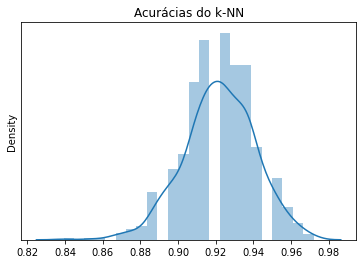

In [32]:
# normalizando
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)

# calculando a média e o desvio padrão
scores = []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  model = KNeighborsClassifier()
  model.fit(X_train,y_train)
  precisao = model.score(X_test,y_test)
  scores.append(precisao)
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

# histograma
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()

# Titanic

In [34]:
# bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import numpy as np

In [43]:
# Importando a base de dados do projeto 
from google.colab import files
uploaded = files.upload()
td = pd.read_csv ('titanic_data.csv') 

Saving titanic_data.csv to titanic_data.csv


In [44]:
# Exibindo as colunas
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
# identificar o tipo de cada variável
print(td.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [46]:
# ver as 5 primeiras linhas dos dados
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# Excluindo as colunas ['PassengerId', 'Name', 'Ticket', 'Cabin'] que não serão úteis nesse caso
td.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

In [48]:
# exibindo as colunas (features) relevantes que sobraram
td.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [49]:
# Vamos dar uma olhada nos valores que faltam em cada coluna e tratar esses campos vazios

# contando os valores faltantes
td.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [50]:
# Exibindo a média por classe
print (td.groupby('Pclass'). mean())

        Survived        Age     SibSp     Parch       Fare
Pclass                                                    
1       0.629630  38.233441  0.416667  0.356481  84.154687
2       0.472826  29.877630  0.402174  0.380435  20.662183
3       0.242363  25.140620  0.615071  0.393075  13.675550


In [52]:
# criando função para inserir idade faltante
def insert_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  
  if pd.isnull(Age):
    if Pclass == 1:
      return 38
    elif Pclass == 2:
      return 30
    else:
      return 25
  else:
    return Age

In [53]:
# aplicando a função aos dataFrame
td['Age'] = td[['Age','Pclass']].apply(insert_age,axis=1)
td['Age'].median()

26.0

In [57]:
# contando os valores faltantes
td.isnull().sum()
td.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,25.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [58]:
# exibindo os tipos de dados
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [59]:
# criando o dataframe sex com a coluna 'Sex' convertida para valores numéricos
sex = pd.get_dummies(td['Sex'],drop_first=True)
print (sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [60]:
# criando o dataframe embark com a coluna 'Embarked' convertida para valores numéricos
embark = pd.get_dummies(td['Embarked'],drop_first=True)
print (embark)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]


In [61]:
# concatendo df com sex e embark
td = pd.concat([td,sex,embark],axis=1)

In [62]:
# verificando o dataframe
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


In [63]:
# exibindo os tipos de dados
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   male      891 non-null    uint8  
 9   C         891 non-null    uint8  
 10  Q         891 non-null    uint8  
 11  S         891 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(4)
memory usage: 59.3+ KB


In [64]:
# separando em Treino e Teste
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(td.drop('Survived',axis=1), td['Survived'], test_size=0.40, random_state=101)

X_train
y_test

331    0
700    1
748    0
751    1
481    0
      ..
53     1
117    0
206    0
462    0
328    1
Name: Survived, Length: 357, dtype: int64

In [66]:
# normalizando
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)

In [67]:
# calculando a média e o desvio padrão
scores = []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  model = KNeighborsClassifier()
  model.fit(X_train,y_train)
  precisao = model.score(X_test,y_test)
  scores.append(precisao)
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

Média: 92.17%
Desvio padrão: 1.95%


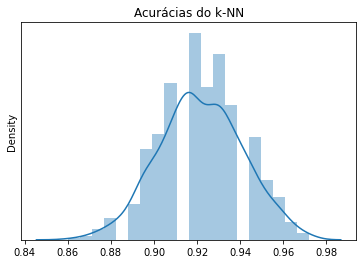

In [68]:
# histograma
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()